### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import VotingClassifier,RandomForestClassifier, GradientBoostingClassifier

### Importing Dataset

In [2]:
data = pd.read_csv('heart_disease_data.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Splitting Independent and dependent variables

In [7]:
x = data.drop(columns=['target','chol','fbs','restecg'], axis=1)
y = data['target']

In [8]:
x.shape

(303, 10)

In [9]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   thalach   303 non-null    int64  
 5   exang     303 non-null    int64  
 6   oldpeak   303 non-null    float64
 7   slope     303 non-null    int64  
 8   ca        303 non-null    int64  
 9   thal      303 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 23.8 KB


### Encoding Categorical data

In [10]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x)

In [12]:
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

### Splitting data into training and testing data

In [40]:
x_train,x_test,y_train,y_test = train_test_split(X_pca,y, test_size = 0.2, random_state = 2, stratify = y)
print(x.shape,x_train.shape,x_test.shape)

(5,) (242, 2) (61, 2)


### Searching best parameters

In [41]:
#KNN best parameters
knn = KNeighborsClassifier()
param_grid_knn = {
    'n_neighbors': list(range(3,32,2)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring='accuracy')

grid_search_knn.fit(x_train, y_train)

best_params_knn = grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_

print(f"Best Parameters knn: {best_params_knn}")
print(f"Best Cross-Validation Score knn: {best_score_knn} \n")

Best Parameters knn: {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'uniform'}
Best Cross-Validation Score knn: 0.8467687074829933 



In [42]:
# SVM best parameters
svm = SVC()
param_grid_svm = {
    'C' : [2**i for i in range(-8, 9)],
    'kernel' : ['linear', 'poly']
}

grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5, scoring='accuracy')

grid_search_svm.fit(x_train, y_train)

best_params_svm = grid_search_svm.best_params_
best_score_svm = grid_search_svm.best_score_

print(f"Best Parameters svm: {best_params_svm}")
print(f"Best Cross-Validation Score svm: {best_score_svm} \n")

Best Parameters svm: {'C': 0.25, 'kernel': 'linear'}
Best Cross-Validation Score svm: 0.8342687074829932 



In [43]:
# Logistic regression Best parameters
lor = LogisticRegression()
param_grid_lor = {
    
    'max_iter' : [100,200,300,400,500]
}

grid_search_lor = GridSearchCV(estimator=lor, param_grid=param_grid_lor, cv=5, scoring='accuracy')

grid_search_lor.fit(x_train, y_train)

best_params_lor = grid_search_lor.best_params_
best_score_lor = grid_search_lor.best_score_

print(f"Best Parameters lor: {best_params_lor}")
print(f"Best Cross-Validation Score lor: {best_score_lor} \n")

Best Parameters lor: {'max_iter': 100}
Best Cross-Validation Score lor: 0.830187074829932 



In [44]:
#Random Forest Best parameters
rf = RandomForestClassifier()

param_grid_rf = {
    'n_estimators': [10, 50, 100, 200,500],
    'max_features': [0.5 , 0.8,'sqrt', 'log2'],
    'bootstrap': [True],   
    'max_samples': [None,0.5]     
}

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy')

grid_search_rf.fit(x_train, y_train)

best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print(f"Best Parameters Random forest: {best_params_rf}")
print(f"Best Cross-Validation Score Random forest: {best_score_rf} \n")

Best Parameters Random forest: {'bootstrap': True, 'max_features': 'log2', 'max_samples': 0.5, 'n_estimators': 100}
Best Cross-Validation Score Random forest: 0.8219387755102041 



In [45]:
# Gradient boosting algorithm
gbc = GradientBoostingClassifier()

param_grid_gbc = {
    'n_estimators' : [50,100,200],
    'learning_rate' : [0.01,0.1,0.2],
    'max_features' : ['sqrt', 'log2'],
    'loss' : ['log_loss', 'exponential'],
    'max_depth' : [3,4,5],
    'criterion' : ['friedman_mse', 'squared_error']
}

grid_search_gbc = GridSearchCV(estimator=gbc, param_grid=param_grid_gbc, cv=5, scoring='accuracy')

grid_search_gbc.fit(x_train, y_train)

best_params_gbc = grid_search_gbc.best_params_
best_score_gbc = grid_search_gbc.best_score_

print(f"Best Parameters gradient boosting classifier: {best_params_gbc}")
print(f"Best Cross-Validation gradient boosting classifier: {best_score_gbc} \n")


Best Parameters gradient boosting classifier: {'criterion': 'squared_error', 'learning_rate': 0.01, 'loss': 'exponential', 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 100}
Best Cross-Validation gradient boosting classifier: 0.8260204081632653 



### Model training using different classifiers

In [19]:
log_clf = LogisticRegression(random_state=42, **best_params_lor)
knn_clf = KNeighborsClassifier(**best_params_knn)
svm_clf = SVC(random_state=42, probability=True, **best_params_svm)
rf_clf = RandomForestClassifier(random_state=42, **best_params_rf)
gbc_clf = GradientBoostingClassifier(random_state=42, **best_params_gbc)

In [20]:
# Accuracy of logistic regression
log_clf.fit(x_train,y_train)
y_pred_log = log_clf.predict(x_test)
accuracy_log = accuracy_score(y_pred_log,y_test)
precision_log = precision_score(y_pred_log,y_test)
recall_log = recall_score(y_pred_log,y_test)
f1_score_log = f1_score(y_pred_log,y_test)
print(f"logistic regression accuracy {accuracy_log}")
print(f"logistic regression precision: {precision_log}")
print(f"logistic regression recall: {recall_log}")
print(f"logistic regression f1_score {f1_score_log} \n")

logistic regression accuracy 0.819672131147541
logistic regression precision: 0.8484848484848485
logistic regression recall: 0.8235294117647058
logistic regression f1_score 0.835820895522388 



In [21]:
# Accuracy of KNeighbours Classifier
knn_clf.fit(x_train,y_train)
y_pred_knn = knn_clf.predict(x_test)
accuracy_knn = accuracy_score(y_test,y_pred_knn)
precision_knn = precision_score(y_test,y_pred_knn)
recall_knn = recall_score(y_test,y_pred_knn)
f1_score_knn = f1_score(y_test,y_pred_knn)
print(f"KNN accuracy {accuracy_knn}")
print(f"KNN precision {precision_knn}")
print(f"KNN recall {recall_knn}")
print(f"KNN f1_score {f1_score_knn} \n")

KNN accuracy 0.7213114754098361
KNN precision 0.75
KNN recall 0.7272727272727273
KNN f1_score 0.7384615384615385 



In [22]:
# Accuracy of SVM
svm_clf.fit(x_train,y_train)
y_pred_svm = svm_clf.predict(x_test)
accuracy_svm = accuracy_score(y_test,y_pred_svm)
precision_svm = precision_score(y_test,y_pred_svm)
recall_svm = recall_score(y_test,y_pred_svm)
f1_score_svm = f1_score(y_test,y_pred_svm)
print(f"Svm accuracy: {accuracy_svm}")
print(f"Svm precision: {precision_svm}")
print(f"Svm recall {recall_svm}")
print(f"Svm f1_score {f1_score_svm} \n")

Svm accuracy: 0.8032786885245902
Svm precision: 0.8
Svm recall 0.8484848484848485
Svm f1_score 0.8235294117647058 



In [23]:
# Accuracy of Random Forest
rf_clf.fit(x_train,y_train)
y_pred_rf = rf_clf.predict(x_test)
accuracy_rf = accuracy_score(y_test,y_pred_rf)
precision_rf = precision_score(y_test,y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_score_rf = f1_score(y_test,y_pred_rf)
print(f"Random forest accuracy: {accuracy_rf}")
print(f"Random forest recall: {recall_rf}")
print(f"Random forest precision: {precision_rf}")
print(f"Random forest f1 score: {f1_score_rf}")

Random forest accuracy: 0.7704918032786885
Random forest recall: 0.7575757575757576
Random forest precision: 0.8064516129032258
Random forest f1 score: 0.78125


In [24]:
# Accuracy of Gradient boosting classifier
gbc_clf.fit(x_train,y_train)
y_pred_gbc = gbc_clf.predict(x_test)
accuracy_gbc = accuracy_score(y_pred_gbc,y_test)
precision_gbc = precision_score(y_pred_gbc,y_test)
recall_gbc = recall_score(y_pred_gbc,y_test)
f1_score_gbc = f1_score(y_pred_gbc,y_test)
print(f"Gradient Boosting Classifier accuracy {accuracy_gbc}")
print(f"Gradient Boosting Classifier precision: {precision_gbc}")
print(f"Gradient Boosting Classifier recall: {recall_gbc}")
print(f"Gradient Boosting Classifier f1_score {f1_score_gbc} \n")

Gradient Boosting Classifier accuracy 0.7540983606557377
Gradient Boosting Classifier precision: 0.7575757575757576
Gradient Boosting Classifier recall: 0.78125
Gradient Boosting Classifier f1_score 0.7692307692307693 



In [25]:
hard_voting_clf= VotingClassifier(
    estimators=[('lr', log_clf), ('knn', knn_clf), ('svc', svm_clf), ('rf', rf_clf), ('gbc', gbc_clf)],
    voting='hard', weights=[0.8,0.8,0.8,1,0.8]
)

# Accuracy of  Hard Voting classifier
hard_voting_clf.fit(x_train,y_train)
y_pred_HVclf = hard_voting_clf.predict(x_test)
accuracy_HVclf = accuracy_score(y_test,y_pred_HVclf)
precision_HVclf = precision_score(y_test,y_pred_HVclf)
recall_HVclf = recall_score(y_test,y_pred_HVclf)
f1_score_HVclf = f1_score(y_test,y_pred_HVclf)
print(f"Hard Voting Ensemble Test Accuracy: {accuracy_HVclf}")
print(f"Hard Voting Ensemble Precision: {precision_HVclf}")
print(f"Hard Voting Ensemble Recall: {recall_HVclf}")
print(f"Hard Voting Ensemble f1_score: {f1_score_HVclf} \n")

Hard Voting Ensemble Test Accuracy: 0.7540983606557377
Hard Voting Ensemble Precision: 0.7647058823529411
Hard Voting Ensemble Recall: 0.7878787878787878
Hard Voting Ensemble f1_score: 0.7761194029850746 



In [26]:
soft_voting_clf= VotingClassifier(
    estimators=[('lr', log_clf), ('knn', knn_clf), ('svc', svm_clf), ('rf', rf_clf), ('gbc', gbc_clf)],
    voting='soft'
)

# Accuracy of Soft Voting classifier
soft_voting_clf.fit(x_train,y_train)
y_pred_SVclf = soft_voting_clf.predict(x_test)
accuracy_SVclf = accuracy_score(y_test,y_pred_SVclf)
precision_SVclf = precision_score(y_test,y_pred_SVclf)
recall_SVclf = recall_score(y_test,y_pred_SVclf)
f1_score_SVclf = f1_score(y_test,y_pred_SVclf)
print(f"\n Soft Voting Ensemble Test Accuracy: {accuracy_SVclf}")
print(f"Soft Voting Ensemble Precision: {precision_SVclf}")
print(f"Soft Voting Ensemble Recall: {recall_SVclf}")
print(f"Soft Voting Ensemble f1_score: {f1_score_SVclf}")


 Soft Voting Ensemble Test Accuracy: 0.7868852459016393
Soft Voting Ensemble Precision: 0.7941176470588235
Soft Voting Ensemble Recall: 0.8181818181818182
Soft Voting Ensemble f1_score: 0.8059701492537313


### Plotting Accuracies

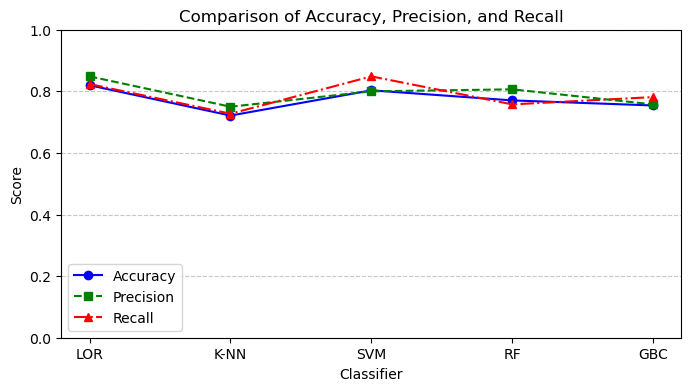

In [27]:
classifiers = ['LOR', 'K-NN', 'SVM', 'RF','GBC']
accuracy = [accuracy_log,accuracy_knn,accuracy_svm,accuracy_rf,accuracy_gbc]  
precision = [precision_log,precision_knn,precision_svm,precision_rf,precision_gbc] 
recall = [recall_log,recall_knn,recall_svm,recall_rf,recall_gbc] 

x = np.arange(len(classifiers))

# Plotting the lines
plt.figure(figsize=(8, 4))
plt.plot(x, accuracy, marker='o', label='Accuracy', linestyle='-', color='blue')
plt.plot(x, precision, marker='s', label='Precision', linestyle='--', color='green')
plt.plot(x, recall, marker='^', label='Recall', linestyle='-.', color='red')

# Adding labels, title, and custom x-axis tick labels
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.title('Comparison of Accuracy, Precision, and Recall')
plt.xticks(x, classifiers)
plt.ylim(0, 1)

# Adding a legend and grid
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

### Analyzing the overlap between Classifiers prediction

In [28]:
pred_df = pd.DataFrame({'log_pred': y_pred_log, 'knn_pred': y_pred_knn, 'svm_pred': y_pred_svm, 'Rf_pred': y_pred_rf })

y_test_df = pd.DataFrame(y_test, columns=['True_Label'])

pred_df = pd.concat([pred_df, y_test.reset_index(drop=True)], axis=1)

In [29]:
pred_df['gbc_pred'] = y_pred_gbc

In [30]:
pred_df['All_Agree'] = (pred_df['log_pred'] == pred_df['knn_pred']) & \
                       (pred_df['knn_pred'] == pred_df['svm_pred']) & \
                       (pred_df['svm_pred'] == pred_df['Rf_pred'])

In [31]:
pred_df['All_Agree'].sum()

47

In [32]:
pred_df['At_Least_Two_Agree'] = ((pred_df['log_pred'] == pred_df['knn_pred']) | 
                                 (pred_df['log_pred'] == pred_df['svm_pred']) | 
                                 (pred_df['log_pred'] == pred_df['Rf_pred']) | 
                                 (pred_df['knn_pred'] == pred_df['svm_pred']) | 
                                 (pred_df['knn_pred'] == pred_df['Rf_pred']) | 
                                 (pred_df['svm_pred'] == pred_df['Rf_pred']))

In [33]:
pred_df['At_Least_Two_Agree'].sum()

61

In [34]:
pred_df['rc'] = ((pred_df['log_pred'] == pred_df['knn_pred']) & 
                 (pred_df['log_pred'] == pred_df['svm_pred']) &
                 (pred_df['log_pred'] == pred_df['Rf_pred']))

In [35]:
pred_df['rc'].sum()

47

In [36]:
pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   log_pred            61 non-null     int64
 1   knn_pred            61 non-null     int64
 2   svm_pred            61 non-null     int64
 3   Rf_pred             61 non-null     int64
 4   target              61 non-null     int64
 5   gbc_pred            61 non-null     int64
 6   All_Agree           61 non-null     bool 
 7   At_Least_Two_Agree  61 non-null     bool 
 8   rc                  61 non-null     bool 
dtypes: bool(3), int64(6)
memory usage: 3.2 KB


In [37]:
pred_df.describe()

,log_pred,knn_pred,svm_pred,Rf_pred,target,gbc_pred
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,0.557377,0.524590,0.573770,0.508197,0.540984,0.524590
std,0.500819,0.503539,0.498632,0.504082,0.502453,0.503539
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
pred_df.drop(columns=['At_Least_Two_Agree', 'rc'], axis=1, inplace=True)

In [39]:
from itertools import combinations
max_disagreement = None
worst_combo = None

# Iterate over all combinations of three models
for combo in combinations(['log_pred', 'knn_pred', 'svm_pred', 'Rf_pred', 'gbc_pred'], 3):
    disagree_count = (~((pred_df[combo[0]] == pred_df[combo[1]]) & (pred_df[combo[1]] == pred_df[combo[2]]))).sum()
    if max_disagreement is None or disagree_count > max_disagreement:
        max_disagreement = disagree_count
        worst_combo = combo

print(f"Combination of models with the most disagreement: {worst_combo}")
print(f"Number of instances where these models disagree: {max_disagreement}")

Combination of models with the most disagreement: ('knn_pred', 'svm_pred', 'Rf_pred')
Number of instances where these models disagree: 14
